# Pandas

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

A [recent analysis](https://stackoverflow.blog/2017/09/06/incredible-growth-python/) of questions from Stack Overflow showed that python is the fastest growing and most widely used programming language in the world (in developed countries).

![python growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/growth_major_languages-1-1024x878.png)

A [follow-up analysis](https://stackoverflow.blog/2017/09/14/python-growing-quickly/) showed that this growth is driven by the data science packages such as numpy, matplotlib, and especially pandas.

![pandas growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/related_tags_over_time-1-1024x1024.png)

The exponential growth of pandas is due to the fact that it _just works_. It saves you time and helps you do science more efficiently and effictively.

### Pandas capabilities (from the Pandas website):

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

In this lecture, we will go over the basic capabilities of Pandas. It is a very deep library, and you will need to dig into the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for more advanced usage.

Pandas was created by [Wes McKinney](http://wesmckinney.com/). Many of the examples here are drawn from Wes McKinney's book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which includes a github repo of [code samples](https://github.com/wesm/pydata-book).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [2]:
names = ['Ryan', 'Chiara', 'Johnny']
values = [35, 36, 1.8]
ages = pd.Series(values, index=names)
ages

Ryan      35.0
Chiara    36.0
Johnny     1.8
dtype: float64

Series have built in plotting methods.

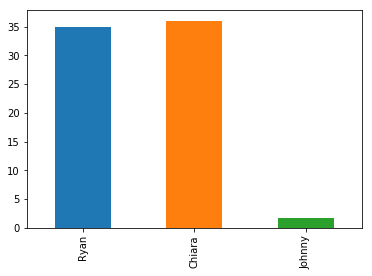

In [3]:
ages.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(ages) / ages**2

Ryan      0.002902
Chiara    0.002765
Johnny    0.181416
dtype: float64

We can access the underlying index object if we need to:

In [5]:
ages.index

Index([u'Ryan', u'Chiara', u'Johnny'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [6]:
ages.loc['Johnny']

1.8

Or by raw position using `.iloc`

In [7]:
ages.iloc[2]

1.8

If we need to, we can always get the raw data back out as well

In [8]:
ages.values

array([35. , 36. ,  1.8])

In [9]:
ages.index

Index([u'Ryan', u'Chiara', u'Johnny'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [10]:
# first we create a dictionary
data = {'age': [35, 36, 1.8],
        'height': [180, 155, 83],
        'weight': [72.5, np.nan, 11.3]}
df = pd.DataFrame(data, index=['Ryan', 'Chiara', 'Johnny'])
df

age  height  weight
Ryan    35.0     180    72.5
Chiara  36.0     155     NaN
Johnny   1.8      83    11.3

Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Ryan to Johnny
Data columns (total 3 columns):
age       3 non-null float64
height    3 non-null int64
weight    2 non-null float64
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [12]:
df.min()

age        1.8
height    83.0
weight    11.3
dtype: float64

In [13]:
df.mean()

age        24.266667
height    139.333333
weight     41.900000
dtype: float64

In [14]:
df.std()

age       19.463128
height    50.362023
weight    43.274935
dtype: float64

In [15]:
df.describe()

age      height     weight
count   3.000000    3.000000   2.000000
mean   24.266667  139.333333  41.900000
std    19.463128   50.362023  43.274935
min     1.800000   83.000000  11.300000
25%    18.400000  119.000000  26.600000
50%    35.000000  155.000000  41.900000
75%    35.500000  167.500000  57.200000
max    36.000000  180.000000  72.500000

We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [16]:
df['height']

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

...or using attribute syntax.

In [17]:
df.height

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

New columns can easily be added to DataFrames

In [18]:
df['density'] = df.weight / df.height
df

age  height  weight   density
Ryan    35.0     180    72.5  0.402778
Chiara  36.0     155     NaN       NaN
Johnny   1.8      83    11.3  0.136145

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [19]:
education = pd.Series(['PhD', 'PhD', None, 'masters'],
                     index=['Ryan', 'Chiara', 'Johnny', 'Takaya'],
                     name='education')
# returns a new DataFrame
df.join(education)

age  height  weight   density education
Ryan    35.0     180    72.5  0.402778       PhD
Chiara  36.0     155     NaN       NaN       PhD
Johnny   1.8      83    11.3  0.136145      None

In [20]:
# returns a new DataFrame
df.join(education, how='right')

age  height  weight   density education
Ryan    35.0   180.0    72.5  0.402778       PhD
Chiara  36.0   155.0     NaN       NaN       PhD
Johnny   1.8    83.0    11.3  0.136145      None
Takaya   NaN     NaN     NaN       NaN   masters

In [21]:
# returns a new DataFrame
df.reindex(['Ryan', 'Chiara', 'Johnny', 'Takaya', 'Kerry'])

age  height  weight   density
Ryan    35.0   180.0    72.5  0.402778
Chiara  36.0   155.0     NaN       NaN
Johnny   1.8    83.0    11.3  0.136145
Takaya   NaN     NaN     NaN       NaN
Kerry    NaN     NaN     NaN       NaN

We can also index using a boolean series. This is very useful

In [22]:
adults = df[df.age > 18]
adults

age  height  weight   density
Ryan    35.0     180    72.5  0.402778
Chiara  36.0     155     NaN       NaN

In [23]:
df['is_adult'] = df.age > 18
df

age  height  weight   density  is_adult
Ryan    35.0     180    72.5  0.402778      True
Chiara  36.0     155     NaN       NaN      True
Johnny   1.8      83    11.3  0.136145     False

## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

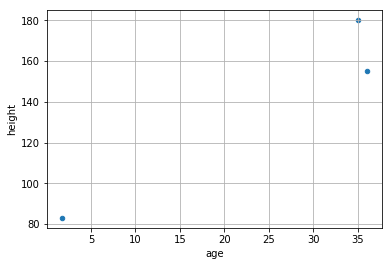

In [24]:
df.plot(kind='scatter', x='age', y='height', grid=True)

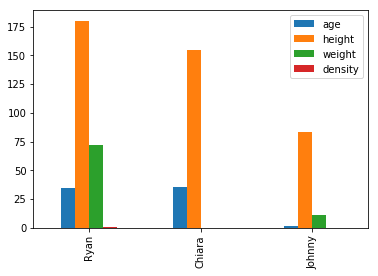

In [25]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

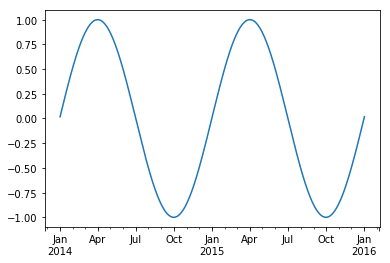

In [26]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

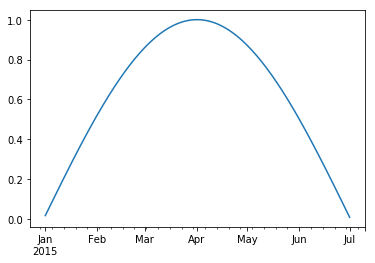

In [27]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

## Stock Market Data

* oops - Ryan's links don't work, so we will use static files

Now we read some stock market data from Google finance. I have created direct links to Google and Apple stock price data.

In [28]:
#!curl -L -o goog.csv http://tinyurl.com/rces-goog
#!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv
! cp /home/pangeo/notebooks/GOOGL.csv goog.csv
! cp /home/pangeo/notebooks/AAPL.csv aapl.csv

In [29]:
! head goog.csv

Date,Open,High,Low,Close,Adj Close,Volume
2006-01-03,211.471466,218.053055,209.319321,217.832840,217.832840,26216100
2006-01-04,222.172165,224.704712,220.095093,222.842850,222.842850,30542200
2006-01-05,223.223221,226.001007,220.970978,225.845840,225.845840,21594900
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478200
2006-01-09,233.438446,236.936935,230.700699,233.683685,233.683685,25558200
2006-01-10,232.442444,235.360367,231.251251,235.115112,235.115112,18176000
2006-01-11,235.870865,237.792786,234.824829,236.051056,236.051056,17996700
2006-01-12,237.097092,237.732727,230.980988,232.047043,232.047043,20230300
2006-01-13,232.387390,233.678680,231.036041,233.358353,233.358353,15297800


We can see that this is well-formated, tidy CSV data, ready for immediate ingestion into Pandas.
We use Pandas' amazing [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function to do this.

In [30]:
goog = pd.read_csv('goog.csv')
goog.head()

Date        Open        High         Low       Close   Adj Close  \
0  2006-01-03  211.471466  218.053055  209.319321  217.832840  217.832840   
1  2006-01-04  222.172165  224.704712  220.095093  222.842850  222.842850   
2  2006-01-05  223.223221  226.001007  220.970978  225.845840  225.845840   
3  2006-01-06  228.663666  235.485489  226.846848  233.063065  233.063065   
4  2006-01-09  233.438446  236.936935  230.700699  233.683685  233.683685   

     Volume  
0  26216100  
1  30542200  
2  21594900  
3  35478200  
4  25558200

Not bad! But we can do better by giving read_csv some hints.

In [31]:
goog = pd.read_csv('goog.csv', parse_dates=[0], index_col=0)
goog.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2006-01-03  211.471466  218.053055  209.319321  217.832840  217.832840   
2006-01-04  222.172165  224.704712  220.095093  222.842850  222.842850   
2006-01-05  223.223221  226.001007  220.970978  225.845840  225.845840   
2006-01-06  228.663666  235.485489  226.846848  233.063065  233.063065   
2006-01-09  233.438446  236.936935  230.700699  233.683685  233.683685   

              Volume  
Date                  
2006-01-03  26216100  
2006-01-04  30542200  
2006-01-05  21594900  
2006-01-06  35478200  
2006-01-09  25558200

In [32]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3091 entries, 2006-01-03 to 2018-04-13
Data columns (total 6 columns):
Open         3091 non-null float64
High         3091 non-null float64
Low          3091 non-null float64
Close        3091 non-null float64
Adj Close    3091 non-null float64
Volume       3091 non-null int64
dtypes: float64(5), int64(1)
memory usage: 169.0 KB


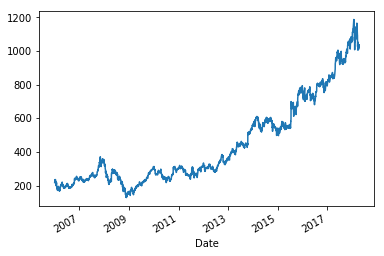

In [33]:
goog.Close.plot()

In [34]:
aapl = pd.read_csv('aapl.csv', parse_dates=[0], index_col=0)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3091 entries, 2006-01-03 to 2018-04-13
Data columns (total 6 columns):
Open         3091 non-null float64
High         3091 non-null float64
Low          3091 non-null float64
Close        3091 non-null float64
Adj Close    3091 non-null float64
Volume       3091 non-null int64
dtypes: float64(5), int64(1)
memory usage: 169.0 KB


In [35]:
aapl_close = aapl.Close.rename('aapl')
goog_close = goog.Close.rename('goog')
stocks = pd.concat([aapl_close, goog_close], axis=1)
stocks.head()

aapl        goog
Date                             
2006-01-03  10.678572  217.832840
2006-01-04  10.710000  222.842850
2006-01-05  10.625714  225.845840
2006-01-06  10.900000  233.063065
2006-01-09  10.864285  233.683685

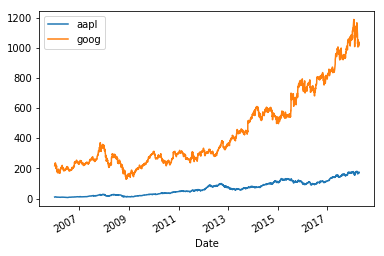

In [36]:
stocks.plot()

Pandas knows how to take correlations. And [tons of other computations](https://pandas.pydata.org/pandas-docs/stable/computation.html).

In [37]:
stocks.corr()

aapl      goog
aapl  1.000000  0.922954
goog  0.922954  1.000000

Because it understands times, it can do really cool stuff like resampling.

/home2/nhn2/miniconda3/envs/python2.7/lib/python2.7/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


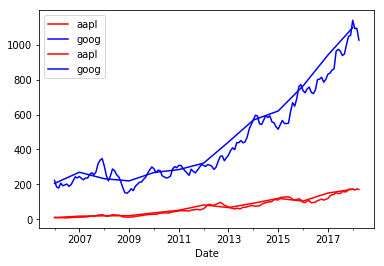

In [38]:
# resample by taking the mean over each month

fig, ax = plt.subplots()
stocks.resample('MS').mean().plot(ax=ax, colors=['r', 'b'])
# and each year
stocks.resample('AS').mean().plot(ax=ax, colors=['r', 'b'])

The string `QS` means "month start. The string `AS` mean "year start". There is a long list of possible [frequency aliases](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases).

We can also apply other reduction operations with resample. These are described in the [resample docs](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling).

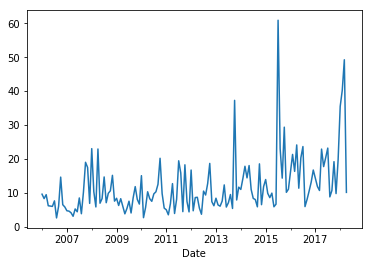

In [39]:
# get resample object
rs = stocks.goog.resample('MS')
# standard deviation of each month
rs.std().plot()

## Temperature Data

We download some timeseries data from the [Berkeley Earth(http://berkeleyearth.org/) surface temperature dataset. This is timeseries data from various locations around earth. Let's get our local temperatures.

In [40]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313k  100  313k    0     0   450k      0 --:--:-- --:--:-- --:--:--  450k


If we examine this data, we see it is NOT a well formated CSV file. Loading it will be a bit painful, but Pandas makes the job retatively easy.

In [41]:
! head -72 nyc_temp.txt | tail -8

% 
%                  Monthly          Annual          Five-year        Ten-year        Twenty-year
% Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
  1743    11    -2.276  1.665       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743    12       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     1       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     2       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN


In [42]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] + 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

year  month  monthly_anom
0  1743     11        -2.276
1  1743     12           NaN
2  1744      1           NaN
3  1744      2           NaN
4  1744      3           NaN

In [43]:
# need a day
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

monthly_anom
1743-11-01 00:00:00        -2.276
1743-12-01 00:00:00           NaN
1744-01-01 00:00:00           NaN
1744-02-01 00:00:00           NaN
1744-03-01 00:00:00           NaN

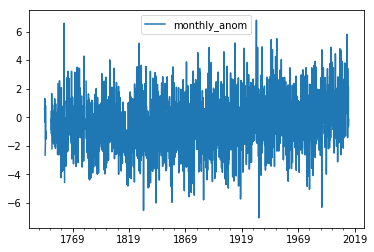

In [44]:
temp.plot()

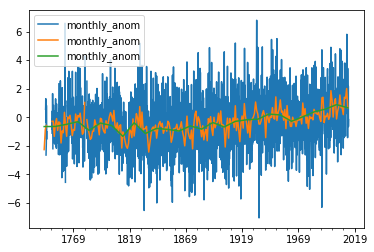

In [45]:
fig, ax = plt.subplots()
temp.plot(ax=ax)
temp.resample('AS').mean().plot(ax=ax)
temp.resample('10AS').mean().plot(ax=ax)

Pandas can do both time-based resampling and operation over fixed-length rolling windows. These are very similar but distinct; see [discussion in Pandas docs](https://pandas.pydata.org/pandas-docs/stable/computation.html#time-aware-rolling-vs-resampling).

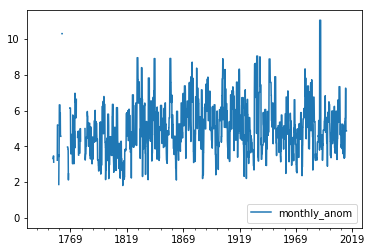

In [46]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot()

To create a "climatology" (i.e. the average of all same months), we can use Pandas' [groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html) functionality.

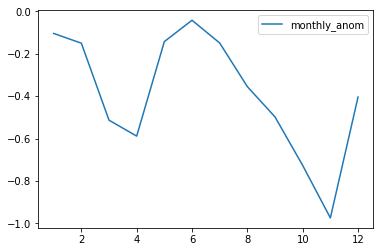

In [47]:
# diurnal cycle has been removed!
temp.groupby(temp.index.month).mean().plot()

In [48]:
# find the hottest years
temp.groupby(temp.index.year).mean().sort_values('monthly_anom', ascending=False).head(10)

monthly_anom
2012      2.009833
1998      1.862250
2006      1.557583
1949      1.424500
2010      1.395917
1991      1.395583
1990      1.360833
2011      1.310583
2002      1.290500
1953      1.212833

## Groupby

Now we will explore groupby's capabilities more in a public dataset from the City of New York: the [Rat Information Portal](The Rat Information Portal)!

In [49]:
# https://data.cityofnewyork.us/Health/Rats/amyk-xiv9
rats = pd.read_csv('https://data.cityofnewyork.us/api/views/amyk-xiv9/rows.csv',
                  parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [50]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218231 entries, 0 to 218230
Data columns (total 20 columns):
INSPECTION_TYPE                218231 non-null object
JOB_TICKET_OR_WORK_ORDER_ID    218231 non-null int64
JOB_ID                         218231 non-null object
JOB_PROGRESS                   218231 non-null int64
BBL                            218231 non-null int64
BORO_CODE                      218231 non-null int64
BLOCK                          215548 non-null float64
LOT                            215548 non-null float64
HOUSE_NUMBER                   214304 non-null object
STREET_NAME                    218175 non-null object
ZIP_CODE                       217023 non-null float64
X_COORD                        216907 non-null float64
Y_COORD                        216907 non-null float64
LATITUDE                       218092 non-null float64
LONGITUDE                      218092 non-null float64
BOROUGH                        218231 non-null object
INSPECTION_DATE       

In [51]:
rats.head()

INSPECTION_TYPE  JOB_TICKET_OR_WORK_ORDER_ID     JOB_ID  JOB_PROGRESS  \
0      COMPLIANCE                      2110773  PO2090711             2   
1      COMPLIANCE                      2127558  PO2113817             2   
2         INITIAL                      2131358  PO2131358             1   
3         INITIAL                      2150812  PO2150812             1   
4      COMPLIANCE                      2128102  PO2115246             2   

          BBL  BORO_CODE   BLOCK   LOT HOUSE_NUMBER           STREET_NAME  \
0  3013040024          3  1304.0  24.0            2        STODDARD PLACE   
1  1004020036          1   402.0  36.0          106              AVENUE B   
2  2024470064          2  2447.0  64.0          257       EAST 164 STREET   
3  2037420001          2  3742.0   1.0         1101          MANOR AVENUE   
4  3033920005          3  3392.0   5.0          723  KNICKERBOCKER AVENUE   

   ZIP_CODE    X_COORD   Y_COORD   LATITUDE  LONGITUDE    BOROUGH  \
0   11225.0   996474.0  181731.0  40.665471 -73.955938   Brooklyn   
1   10009.0   989368.0  203405.0  40.724924 -73.981326  Manhattan   
2   10456.0  1007105.0  241255.0  40.828618 -73.917451      Bronx   
3   10472.0  1018617.0  240398.0  40.826439 -73.875820      Bronx   
4   11221.0  1009221.0  192146.0  40.694031 -73.909951   Brooklyn   

      INSPECTION_DATE            RESULT       APPROVED_DATE  \
0 2019-11-04 15:40:49  Active Rat Signs 2019-11-06 10:03:51   
1 2019-11-01 12:45:19  Active Rat Signs 2019-11-06 09:11:47   
2 2019-11-04 16:17:38  Active Rat Signs 2019-11-06 10:58:07   
3 2019-11-04 11:56:05  Active Rat Signs 2019-11-06 14:55:42   
4 2019-10-29 10:16:56  Active Rat Signs 2019-11-06 16:08:23   

                              LOCATION  
0  (40.665470953232, -73.955937552675)  
1   (40.72492418461, -73.981325959827)  
2  (40.828617551661, -73.917450560229)  
3  (40.826439194567, -73.875820359062)  
4   (40.694030894349, -73.90995119043)

Let's do some grouping to explore the data.

In [52]:
rats.groupby('INSPECTION_TYPE')['INSPECTION_TYPE'].count()

INSPECTION_TYPE
COMPLIANCE     73364
INITIAL       144867
Name: INSPECTION_TYPE, dtype: int64

In [53]:
rats.groupby('BORO_CODE')['BORO_CODE'].count().head()

BORO_CODE
1    66716
2    74417
3    61477
4    13151
5     2470
Name: BORO_CODE, dtype: int64

In [54]:
rats.groupby('STREET_NAME')['STREET_NAME'].count().head(20)

STREET_NAME
                                    1
  11 AVENUE                         1
  20 LANE                           2
  32 PLACE                          2
  33 STREET                         1
  34 STREET                         1
  39 ROAD                           2
  53 ROAD                           1
  55 DRIVE                          3
  72 ROAD                           1
 136 STREET                         1
 35 STREET                          1
 36 AVENUE                          1
 60 STREET                          3
 ADELPHI STREET                     1
 BAILEY AVENUE                      1
 BEDFORD STREET                     1
 BERGEN STREET                      1
 BOERUM STREET                      1
 BOGART STREET                      1
Name: STREET_NAME, dtype: int64

This dataset clearly needs some cleaning. We can Pandas' [text features](https://pandas.pydata.org/pandas-docs/stable/text.html) to strip the whitespace out of the data.

In [55]:
# clean up street name
street_names_cleaned = rats.STREET_NAME.str.strip()
street_names_cleaned.groupby(street_names_cleaned).count().head(20)

STREET_NAME
                          1
********************    113
0000                      1
1 AVENUE                939
1 PLACE                   6
1 STREET                 25
1/2 2 AVENUE              1
1/2 5 AVENUE              2
1/2 7 AVENUE SOUTH        4
1/2 BEDFORD STREET        1
1/2 BRIGGS AVENUE         1
1/2 CATHERINE STREET      1
1/2 DOWNING STREET        1
1/2 EAST 115 STREET       6
1/2 EAST 7 STREET         3
1/2 EAST 9 STREET         1
1/2 KING STREET           1
1/2 MULBERRY STREET       3
1/2 ROGERS AVENUE         5
1/2 ST MARKS PLACE        1
Name: STREET_NAME, dtype: int64

In [56]:
count = street_names_cleaned.groupby(street_names_cleaned).count()
count.sort_values(ascending=False).head(20)

STREET_NAME
BROADWAY              3386
GRAND CONCOURSE       2904
AMSTERDAM AVENUE      1683
WEBSTER AVENUE        1655
3 AVENUE              1551
LAFAYETTE AVENUE      1549
PARK AVENUE           1418
MORRIS AVENUE         1410
JEROME AVENUE         1390
BEDFORD AVENUE        1354
ST NICHOLAS AVENUE    1313
WALTON AVENUE         1280
GREENE AVENUE         1259
LEXINGTON AVENUE      1190
2 AVENUE              1189
EASTERN PARKWAY       1177
VALENTINE AVENUE      1067
WILLOUGHBY AVENUE     1047
WASHINGTON AVENUE     1010
MADISON STREET        1002
Name: STREET_NAME, dtype: int64

To get a better idea of the geography, let's plot the locations of the inspections. But first let's look at the statistics.

In [57]:
rats[['LATITUDE', 'LONGITUDE']].describe()

LATITUDE      LONGITUDE
count  218092.000000  218092.000000
mean       40.545938     -73.523365
std         3.025624       5.485032
min         0.000000     -74.249307
25%        40.700123     -73.956776
50%        40.783610     -73.930537
75%        40.839360     -73.902904
max        40.912863       0.000000

There are clearly some weird outliers in the location data. We need to strip these out before plotting.

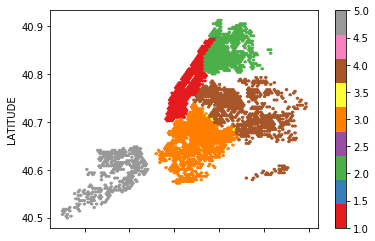

In [58]:
valid_latlon = rats[(rats.LATITUDE > 30) & (rats.LONGITUDE < -70)]
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', C='BORO_CODE', cmap='Set1')

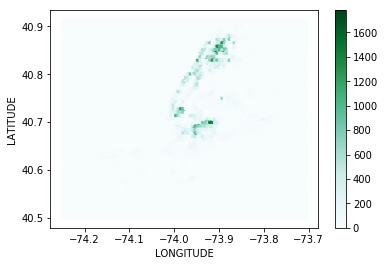

In [59]:
# https://github.com/pandas-dev/pandas/issues/10678
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False)

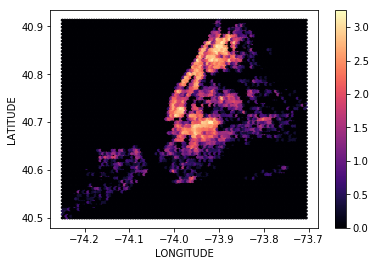

In [60]:
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

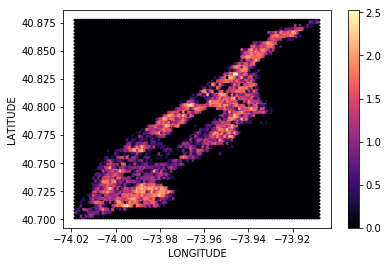

In [61]:
manhattan_rats = valid_latlon[valid_latlon.BORO_CODE==1]
manhattan_rats.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

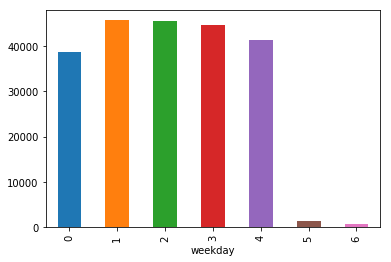

In [62]:
inspection_date = pd.DatetimeIndex(rats.INSPECTION_DATE)

fig, ax = plt.subplots()
rats.groupby(inspection_date.weekday)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('weekday');

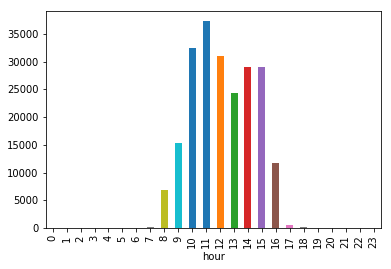

In [63]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.hour)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('hour');

Text(0.5,0,'month')

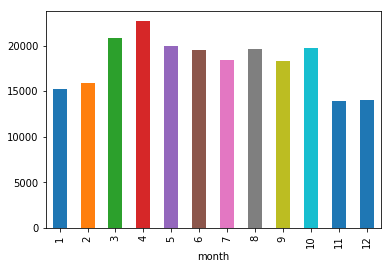

In [64]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.month)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('month')